# Setup

In [1]:
suppressWarnings(install.packages('xgboost'))
suppressWarnings(install.packages('Metrics'))

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
suppressMessages(library(tidyverse))
suppressMessages(library(dplyr))
suppressMessages(library(lubridate))
suppressMessages(library(ggplot2))
suppressMessages(library(caret))
suppressMessages(library(Matrix))
suppressMessages(library(Metrics))
suppressMessages(library(xgboost))

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”


In [3]:
train <- read_csv("train.csv", col_types = cols())
histdata <- read_csv("historical_transactions_small.csv", col_types = cols())
newdata <- read_csv("new_merchant_transactions_small.csv", col_types = cols())
merchants <- read_csv("merchants.csv", col_types = cols())

Warning message:
“Missing column names filled in: 'X1' [1]”
Warning message:
“Missing column names filled in: 'X1' [1]”


In [22]:
dim(train)
head(train)

[1] 199710      6

first_active_month,card_id,feature_1,feature_2,feature_3,target
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2017-06,C_ID_92a2005557,5,2,1,-0.8202826
2017-01,C_ID_3d0044924f,4,1,0,0.3929132
2016-08,C_ID_d639edf6cd,2,2,0,0.6880560
2017-09,C_ID_186d6a6901,4,3,0,0.1424952
2017-11,C_ID_cdbd2c0db2,1,3,0,-0.1597492
2016-09,C_ID_0894217f2f,4,2,0,0.8715853


In [23]:
dim(histdata)
head(histdata)

[1] 2911236      15

X1,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
1,0,C_ID_9fb702910d,69,N,0,A,278,M_ID_600b6035fe,-6,-0.7262013,2017-04-29 21:21:37,1,9,37
2,0,C_ID_169c012cfa,267,N,1,B,705,M_ID_50f10cee6a,-3,-0.5821872,2017-07-15 17:09:29,1,16,33
3,0,C_ID_d4ce5c0074,12,N,0,A,108,M_ID_a62766992f,-8,-0.6937741,2017-06-17 11:42:35,5,5,34
4,0,C_ID_12d02f61d4,-1,Y,1,B,491,M_ID_79692349d6,-5,-0.7380421,2017-09-18 19:39:04,NA,-1,3
5,0,C_ID_40ec1f710e,206,N,0,A,437,M_ID_6129ac9479,-3,-0.7018283,2017-11-14 22:32:28,2,23,15
6,0,C_ID_6e504c2959,69,N,0,A,683,M_ID_36f9e41993,-2,-0.6523910,2017-12-27 21:22:32,1,9,34


In [24]:
dim(newdata)
head(newdata)

[1] 196303     15

X1,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
1,Y,C_ID_42478ab598,21,N,0,A,560,M_ID_562baba17e,2,-0.6297010,2018-04-16 19:10:43,1,9,34
2,Y,C_ID_4a13b2a14b,-1,Y,1,B,302,M_ID_b9f9332438,2,-0.7450595,2018-02-05 11:28:24,NA,-1,22
3,Y,C_ID_10c5a8db69,179,N,1,B,842,M_ID_14e3ff6bdc,2,-0.7303786,2018-04-23 13:47:19,NA,-1,37
4,Y,C_ID_81462512fa,171,N,1,B,278,M_ID_de7e1c24b5,2,-0.7072378,2018-04-21 14:15:58,5,21,37
5,Y,C_ID_3c6f508e21,158,N,1,B,511,M_ID_c58f22922e,1,-0.6266957,2017-07-13 16:45:21,1,15,7
6,Y,C_ID_845659d13c,69,N,2,C,87,M_ID_a82ce408f0,2,-0.6131718,2018-04-15 16:36:13,1,9,27


In [25]:
dim(merchants)
head(merchants)

[1] 334696     22

merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,⋯,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
M_ID_838061e48c,8353,792,9,-0.05747065,-0.05747065,N,E,E,-0.40,⋯,-2.25,18.6666667,6,-2.32,13.9166667,12,N,242,9,1
M_ID_9339d880ad,3184,840,20,-0.05747065,-0.05747065,N,E,E,-0.72,⋯,-0.74,1.2916667,6,-0.57,1.6875000,12,N,22,16,1
M_ID_e726bbae1e,447,690,1,-0.05747065,-0.05747065,N,E,E,-82.13,⋯,-82.13,260.0000000,2,-82.13,260.0000000,2,N,-1,5,5
M_ID_a70e9c5f81,5026,792,9,-0.05747065,-0.05747065,Y,E,E,NA,⋯,NA,4.6666667,6,NA,3.8333333,12,Y,-1,-1,NA
M_ID_64456c37ce,2228,222,21,-0.05747065,-0.05747065,Y,E,E,NA,⋯,NA,0.3611111,6,NA,0.3472222,12,Y,-1,-1,NA
M_ID_a0915f62b5,20201,87,27,-0.05747065,-0.05747065,N,E,E,NA,⋯,NA,3.6666667,6,NA,3.8333333,12,Y,160,21,5


### Explore

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-33.21928  -0.88311  -0.02344  -0.39364   0.76545  17.96507 

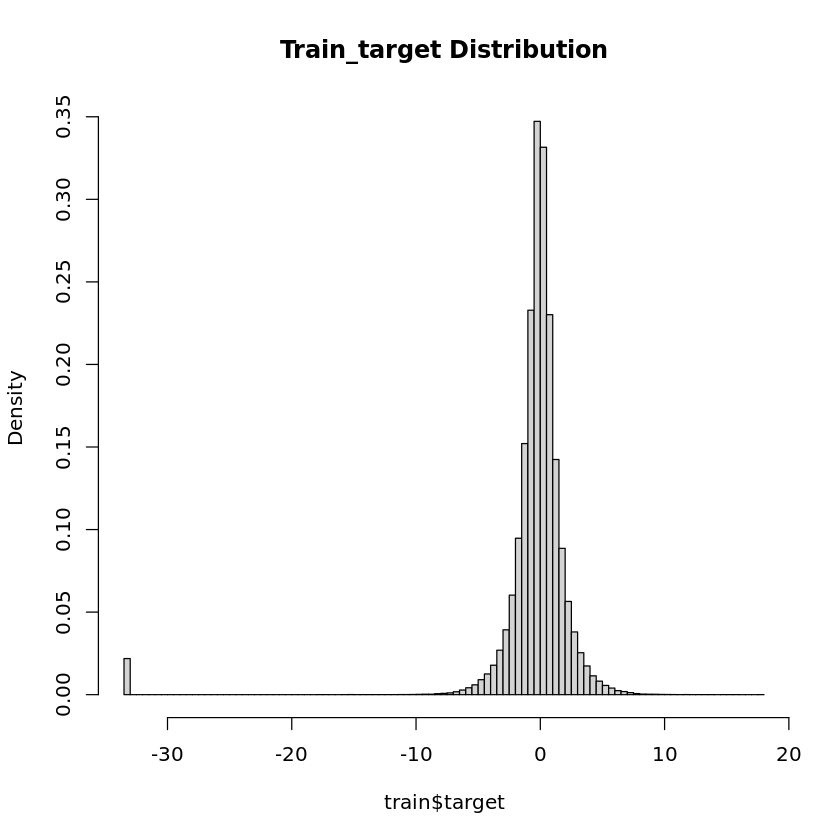

In [4]:
# train target
summary(train$target)

# plot distribution
hist(train$target, breaks=100, freq=FALSE, col="lightgray", main="Train_target Distribution")

### Remove Outliers

In [5]:
train <- filter(train, target > (-30))

# Featrue Selection

### historical transaction data

#### Convert categorical features

In [26]:
table(histdata$category_1)
table(histdata$category_2)
table(histdata$category_3)


      N       Y 
2703478  207758 


      1       2       3       4       5 
1518080  102669  391882  261984  372319 


      A       B       C 
1541626 1167687  184237 

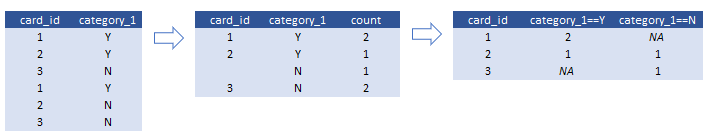

In [6]:
# histdata category
hist_cat1 <- histdata %>% group_by(card_id,category_1) %>% 
        summarize(count=n())%>%
        spread(key=category_1, value=count)
# card_id, # of category_1==Y, # of category_1==N

hist_cat2 <- histdata %>% group_by(card_id,category_2) %>% 
        summarize(count=n())%>%
        spread(key=category_2, value=count)
# card_id, # of category_2==1, # of category_2==2,...

hist_cat3 <- histdata %>% group_by(card_id,category_3) %>% 
        summarize(count=n())%>%
        spread(key=category_3, value=count)
# card_id, # of category_3==A, # of category_3==B, category_3==C, # of category_3==D

`summarise()` has grouped output by 'card_id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'card_id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'card_id'. You can override using the `.groups` argument.



##### count unique categories and merchant (category_1,category_2,category_3, merchant_category_id, merchant_id )

In [7]:
hist_summary2 <- histdata %>% group_by(card_id)%>%
        summarise_at(vars(starts_with("merchant_"),starts_with("category")), n_distinct, na.rm = TRUE) #summarise_at(vars(column name), funs(function))

#### Number of transaction and information about purchase_date 

In [8]:
suppressWarnings(
hist_summary3 <- histdata %>% group_by(card_id)%>%
        summarize(no_trans=n(), 
                  # purchase term (difference between the oldest transaction date - the newest date)
                  pur_term = as.integer(diff(range(purchase_date))), 
                  # how many days between each transaction
                  avg_term = as.integer(mean(abs(difftime(sort(purchase_date), lag(sort(purchase_date),1), units='days')), na.rm=TRUE))
        ))

#### Caluculate SUM, MEAN, MIN, MAX, SD, and number of unique categories for several variables and combine all tables created above

In [9]:
fn <- funs(sum, mean, min, max, sd, n_distinct, .args = list(na.rm = TRUE))
histdata$authorized_flag <- ifelse(histdata$authorized_flag == "Y",1,0)

hist_summary <- histdata %>%
        group_by(card_id) %>% 
        select(c("card_id","purchase_amount","month_lag","installments","authorized_flag")) %>% #month_lag= # of months between purchase_date and 2018-02 
        summarize_all(fn) %>%
        left_join(hist_summary2,by="card_id") %>%
        left_join(hist_summary3,by="card_id") %>%
        left_join(hist_cat1,by="card_id") %>%
        left_join(hist_cat2[,-7],by="card_id") %>% #remove NA column
        left_join(hist_cat3[,-5],by="card_id")  #remove NA column

head(hist_summary)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


card_id,purchase_amount_sum,month_lag_sum,installments_sum,authorized_flag_sum,purchase_amount_mean,month_lag_mean,installments_mean,authorized_flag_mean,purchase_amount_min,⋯,N,Y,1,2,3,4,5,A,B,C
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
C_ID_00007093c1,-10.845235,-103,25,0,-0.5422617,-5.150000,1.2500000,0,-0.7093415,⋯,17,3,NA,NA,17,NA,NA,NA,16,4
C_ID_0001238066,-13.726508,-40,41,0,-0.6239322,-1.818182,1.8636364,0,-0.7318963,⋯,21,1,20,NA,NA,NA,1,NA,15,7
C_ID_0001506ef0,-1.269320,-27,0,0,-0.2115533,-4.500000,0.0000000,0,-0.7243680,⋯,6,NA,NA,NA,6,NA,NA,6,NA,NA
C_ID_0001793786,-3.095386,-35,0,0,-0.2813988,-3.181818,0.0000000,0,-0.7214829,⋯,11,NA,NA,5,2,NA,NA,11,NA,NA
C_ID_000183fdda,-5.931130,-23,23,0,-0.5391936,-2.090909,2.0909091,0,-0.7228654,⋯,11,NA,NA,NA,11,NA,NA,NA,8,3
C_ID_00024e244b,-4.438261,-47,1,0,-0.6340372,-6.714286,0.1428571,0,-0.7356680,⋯,7,NA,NA,NA,7,NA,NA,6,1,NA


### new merchants transaction data

#### Convert categorical features

In [10]:
# newdata category
new_cat1 <- newdata %>% group_by(card_id,category_1) %>% 
        summarize(count=n())%>%
        spread(key=category_1, value=count)

new_cat2 <- newdata %>% group_by(card_id,category_2) %>% 
        summarize(count=n())%>%
        spread(key=category_2, value=count)

new_cat3 <- newdata %>% group_by(card_id,category_3) %>% 
        summarize(count=n())%>%
        spread(key=category_3, value=count)

`summarise()` has grouped output by 'card_id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'card_id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'card_id'. You can override using the `.groups` argument.



In [11]:
# rename columns
colnames(new_cat1) <- c("card_id","new_N", "new_Y")
colnames(new_cat2) <- c("card_id","new1", "new2","new3","new4","new5","na")
colnames(new_cat3) <- c("card_id","new_A", "new_B", "new_C", "na")


#### Merge new transaction & merchants data

In [12]:
new_merge <- newdata %>%
        left_join(merchants, by="merchant_id",suffix = c("_new", "_m"))

##### Count unique categories and merchant (category_1,category_2,category_3, merchant_category_id, merchant_id )

In [13]:
new_summary2 <- new_merge %>% group_by(card_id)%>%
        summarise_at(vars(starts_with("merchant_"),starts_with("category")), n_distinct, na.rm = TRUE) 

#### Number of transaction and information about purchase_date

In [14]:
new_summary3 <- new_merge %>%
        group_by(card_id) %>% 
        summarise(
                new_no_trans=n(), 
                new_pur_term = as.integer(diff(range(purchase_date))),
                new_avg_term = as.integer(mean(abs(difftime(sort(purchase_date), lag(sort(purchase_date),1), units='days')), na.rm=TRUE))
        )

#### Caluculate SUM, MEAN, MIN, MAX, SD, and number of unique categories for several variables and combine all tables created above

In [15]:
new_merge$authorized_flag <- ifelse(new_merge$authorized_flag == "Y",1,0)
suppressWarnings(
new_summary <- new_merge %>%
        group_by(card_id) %>% 
        select(c("card_id","purchase_amount","month_lag","installments","authorized_flag","avg_purchases_lag3","avg_purchases_lag6","avg_purchases_lag12")) %>% 
                 # month_lag: might show the relationship between [royalty score] and [how recent the customer buys]
                 #avg_purchases_lag: might show the relationship between [royalty score] and [# of transaction of each merchant]
        summarize_all(fn) %>%
        left_join(new_summary2,by="card_id") %>%
        left_join(new_summary3,by="card_id") %>%
        left_join(new_cat1, by="card_id") %>%
        left_join(new_cat2[,-7],by="card_id") %>%
        left_join(new_cat3[,-5],by="card_id") 
)
head(new_summary)

card_id,purchase_amount_sum,month_lag_sum,installments_sum,authorized_flag_sum,avg_purchases_lag3_sum,avg_purchases_lag6_sum,avg_purchases_lag12_sum,purchase_amount_mean,month_lag_mean,⋯,new_N,new_Y,new1,new2,new3,new4,new5,new_A,new_B,new_C
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
C_ID_0001793786,-0.09644015,3,0,3,4.3506664,4.5910083,4.743169,-0.03214672,1,⋯,3,NA,1,2,NA,NA,NA,3,NA,NA
C_ID_0005f16cc8,-0.68992726,2,0,1,1.0670403,1.0868934,1.163601,-0.68992726,2,⋯,1,NA,NA,NA,1,NA,NA,1,NA,NA
C_ID_0006152db8,-0.74029613,2,0,1,0.9690171,0.9845086,1.016560,-0.74029613,2,⋯,1,NA,NA,NA,NA,1,NA,1,NA,NA
C_ID_000616f4a8,-0.53864034,1,1,1,1.1428571,1.5674603,1.642857,-0.53864034,1,⋯,1,NA,1,NA,NA,NA,NA,NA,1,NA
C_ID_000844d8f1,-2.15459143,3,0,3,3.5113181,3.4718924,3.340549,-0.71819714,1,⋯,3,NA,3,NA,NA,NA,NA,3,NA,NA
C_ID_0009150c11,-2.93954634,8,0,4,15.9380488,19.1051335,19.549479,-0.73488659,2,⋯,3,NA,1,NA,NA,2,NA,3,NA,NA


### Train Data

#### Convert the data about month of first purchase and calculate the purchase term between first_active_month and reference date (2018-02)

In [16]:
train_data <- train %>% 
        mutate(first_active_month = ymd(first_active_month, truncated = 1),
               year = year(first_active_month),
               month = month(first_active_month),
               howlong = as.integer(ymd("2018-02-01") - first_active_month)) %>%
        left_join(hist_summary, by="card_id") %>%
        left_join(new_summary,by="card_id",suffix = c("", "_new"))

head(train_data)

# fill 0 to NA 
train_data[is.na(train_data)] <- 0
head(train_data)
dim(train_data)

first_active_month,card_id,feature_1,feature_2,feature_3,target,year,month,howlong,purchase_amount_sum,⋯,new_N,new_Y,new1,new2,new3,new4,new5,new_A,new_B,new_C
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2017-06-01,C_ID_92a2005557,5,2,1,-0.8202826,2017,6,245,-14.628745,⋯,2,NA,2,NA,NA,NA,NA,2,NA,NA
2017-01-01,C_ID_3d0044924f,4,1,0,0.3929132,2017,1,396,-18.333276,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2016-08-01,C_ID_d639edf6cd,2,2,0,0.6880560,2016,8,549,-2.057205,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017-09-01,C_ID_186d6a6901,4,3,0,0.1424952,2017,9,153,-4.995338,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.1597492,2017,11,92,-8.336574,⋯,5,1,NA,NA,2,3,NA,NA,5,1
2016-09-01,C_ID_0894217f2f,4,2,0,0.8715853,2016,9,518,-2.049541,⋯,1,NA,1,NA,NA,NA,NA,NA,NA,1


first_active_month,card_id,feature_1,feature_2,feature_3,target,year,month,howlong,purchase_amount_sum,⋯,new_N,new_Y,new1,new2,new3,new4,new5,new_A,new_B,new_C
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2017-06-01,C_ID_92a2005557,5,2,1,-0.8202826,2017,6,245,-14.628745,⋯,2,0,2,0,0,0,0,2,0,0
2017-01-01,C_ID_3d0044924f,4,1,0,0.3929132,2017,1,396,-18.333276,⋯,0,0,0,0,0,0,0,0,0,0
2016-08-01,C_ID_d639edf6cd,2,2,0,0.6880560,2016,8,549,-2.057205,⋯,0,0,0,0,0,0,0,0,0,0
2017-09-01,C_ID_186d6a6901,4,3,0,0.1424952,2017,9,153,-4.995338,⋯,0,0,0,0,0,0,0,0,0,0
2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.1597492,2017,11,92,-8.336574,⋯,5,1,0,0,2,3,0,0,5,1
2016-09-01,C_ID_0894217f2f,4,2,0,0.8715853,2016,9,518,-2.049541,⋯,1,0,1,0,0,0,0,0,0,1


[1] 199710    116

## Create train/test dataset

In [17]:
data <- train_data[,-c(1,2)] # Remove first_active_month and card_id

set.seed(1)
divideData<-createDataPartition(data$target, p=.8, list=FALSE)

data <- data[divideData,]
test.final <- data[-divideData,]

data_train_final <- as.matrix(data[,-4])
dtrain_final <- xgb.DMatrix(data = data_train_final, label = data$target)

data_test_final <- as.matrix(test.final[,-4])
dtest_final <- xgb.DMatrix(data = data_test_final)

## Train XGBoost model

In [18]:
params <- list(objective = "reg:linear",
               booster = "gbtree",
               eval_metric = "rmse",
               nthread = 4,
               eta = 0.01,
               max_depth = 8,
               min_child_weight = 5,
               gamma = 1,
               subsample = 0.8,
               colsample_bytree = 0.7,
               colsample_bylevel = 0.6,
               alpha = 0.1,
               lambda = 5)

In [19]:
xgb_model <- xgboost(params = params, 
                     data=dtrain_final, 
                     nrounds = 150, 
                     print_every_n = 50, 
                     early_stopping_rounds = 50)

[16:06:20] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[1]	train-rmse:1.789764 
Will train until train_rmse hasn't improved in 50 rounds.

[51]	train-rmse:1.718020 
[101]	train-rmse:1.686312 
[150]	train-rmse:1.670751 


In [20]:
yhat.boost <- predict(xgb_model, newdata = dtest_final, n.trees=500)
rmse <- sqrt(mean((yhat.boost-test.final$target)^2))
cat("Test RMSE:",rmse)
r <- cbind(actual= test.final$target, predicted = format(yhat.boost, scientific=F))
head(r)

Test RMSE: 1.680111

actual,predicted
-0.15974919,-0.193341150880
-1.02956173,0.044553041458
4.74760223,0.344445437193
-0.09074446,0.032697375864
-1.36171997,0.242008909583
-4.73077842,-0.006587007549


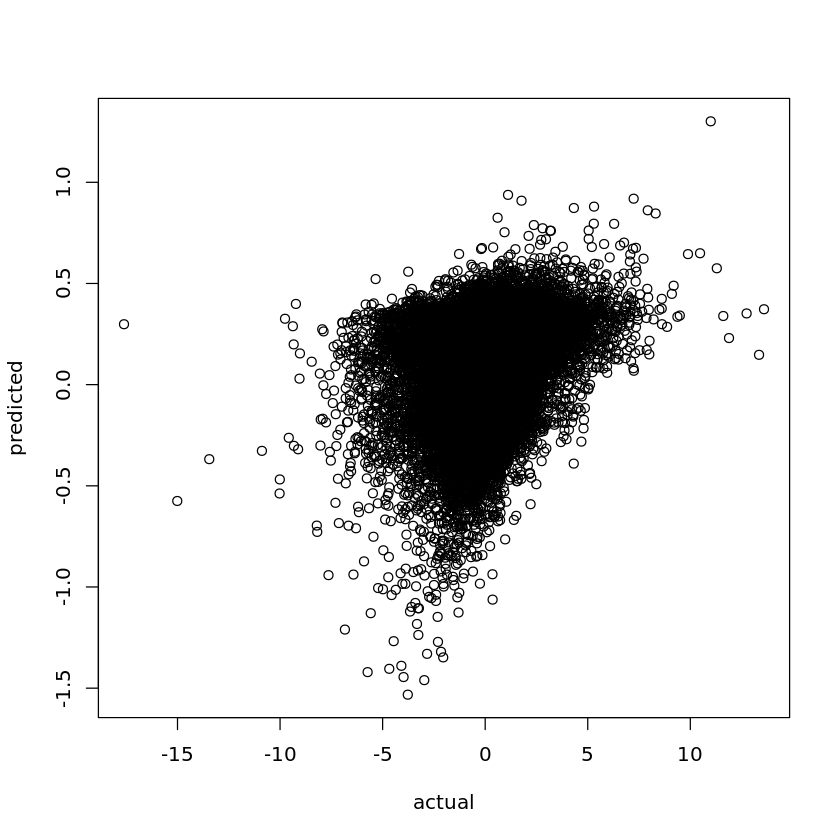

In [21]:
plot(r)